<a href="https://colab.research.google.com/github/Vincent-Emma/DS-Unit-2-Kaggle-Challenge/blob/master/Vince_assignment_kaggle_challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Kaggle Challenge, Module 1

## Assignment
- [ ] Do train/validate/test split with the Tanzania Waterpumps data.
- [ ] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features. (For example, [what other columns have zeros and shouldn't?](https://github.com/Quartz/bad-data-guide#zeros-replace-missing-values) What other columns are duplicates, or nearly duplicates? Can you extract the year from date_recorded? Can you engineer new features, such as the number of years from waterpump construction to waterpump inspection?)
- [ ] Select features. Use a scikit-learn pipeline to encode categoricals, impute missing values, and fit a decision tree classifier.
- [ ] Get your validation accuracy score.
- [ ] Get and plot your feature importances.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.


## Stretch Goals

### Reading

- A Visual Introduction to Machine Learning
  - [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)
  - [Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU) — _Don’t worry about understanding the code, just get introduced to the concepts. This 10 minute video has excellent diagrams and explanations._
- [Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)


### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Try other [scikit-learn imputers](https://scikit-learn.org/stable/modules/impute.html).
- [ ] Try other [scikit-learn scalers](https://scikit-learn.org/stable/modules/preprocessing.html).
- [ ] Make exploratory visualizations and share on Slack.


#### Exploratory visualizations

Visualize the relationships between feature(s) and target. I recommend you do this with your training set, after splitting your data. 

For this problem, you may want to create a new column to represent the target as a number, 0 or 1. For example:

```python
train['functional'] = (train['status_group']=='functional').astype(int)
```



You can try [Seaborn "Categorical estimate" plots](https://seaborn.pydata.org/tutorial/categorical.html) for features with reasonably few unique values. (With too many unique values, the plot is unreadable.)

- Categorical features. (If there are too many unique values, you can replace less frequent values with "OTHER.")
- Numeric features. (If there are too many unique values, you can [bin with pandas cut / qcut functions](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html?highlight=qcut#discretization-and-quantiling).)

You can try [Seaborn linear model plots](https://seaborn.pydata.org/tutorial/regression.html) with numeric features. For this problem, you may want to use the parameter `logistic=True`

You do _not_ need to use Seaborn, but it's nice because it includes confidence intervals to visualize uncertainty.

#### High-cardinality categoricals

This code from a previous assignment demonstrates how to replace less frequent values with 'OTHER'

```python
# Reduce cardinality for NEIGHBORHOOD feature ...

# Get a list of the top 10 neighborhoods
top10 = train['NEIGHBORHOOD'].value_counts()[:10].index

# At locations where the neighborhood is NOT in the top 10,
# replace the neighborhood with 'OTHER'
train.loc[~train['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
test.loc[~test['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
```



In [0]:
# If you're in Colab...
import os, sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    # Install required python packages:
    # category_encoders, version >= 2.0
    # pandas-profiling, version >= 2.0
    # plotly, version >= 4.0
    !pip install --upgrade category_encoders pandas-profiling plotly
    
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge.git
    !git pull origin master
    
    # Change into directory for module
    os.chdir('module1')

     |████████████████████████████████| 92kB 5.8MB/s 
     |████████████████████████████████| 133kB 15.0MB/s 
Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.1.1)
     |████████████████████████████████| 614kB 39.9MB/s 
     |████████████████████████████████| 225kB 45.0MB/s 
     |████████████████████████████████| 768kB 39.6MB/s 
     |████████████████████████████████| 194kB 48.7MB/s 
     |████████████████████████████████| 51kB 22.5MB/s 
     |████████████████████████████████| 737kB 46.2MB/s 
     |████████████████████████████████| 51kB 24.6MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.3.0-py2.py3-none-any.whl size=145035 sha256=9d6cbe7adbf07bc20db4b9a7362f6ac84dd000cafdbc8d671709dda225071cf6
  Stored in directory: /root/.cache/pip/wheels/ce/c7/f1/dbfef4848ebb048cb1d4a22d1ed0c62d8ff2523747235e19fe
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=735f7e02218eb03a8934345b9a5ca7f5a47f2eda

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv('../data/tanzania/train_features.csv'), 
                 pd.read_csv('../data/tanzania/train_labels.csv'))
test = pd.read_csv('../data/tanzania/test_features.csv')
sample_submission = pd.read_csv('../data/tanzania/sample_submission.csv')

train.shape, test.shape

((59400, 41), (14358, 40))

In [0]:
train, validate = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train['status_group'], random_state=42)
train.shape, validate.shape, test.shape

((47520, 41), (11880, 41), (14358, 40))

In [0]:
validate.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

In [0]:
train.describe()

id     amount_tsh  ...    population  construction_year
count  47520.000000   47520.000000  ...  47520.000000       47520.000000
mean   37037.915699     321.925261  ...    179.805513        1302.768939
std    21412.099719    3197.240487  ...    463.081564         950.955437
min        0.000000       0.000000  ...      0.000000           0.000000
25%    18482.750000       0.000000  ...      0.000000           0.000000
50%    36986.500000       0.000000  ...     25.000000        1986.000000
75%    55450.250000      25.000000  ...    215.000000        2004.000000
max    74247.000000  350000.000000  ...  15300.000000        2013.000000

[8 rows x 10 columns]

In [0]:
train.describe(exclude='number')

date_recorded                  funder  ... waterpoint_type_group status_group
count          47520                   44616  ...                 47520        47520
unique           349                    1716  ...                     6            3
top       2011-03-17  Government Of Tanzania  ...    communal standpipe   functional
freq             474                    7321  ...                 27642        25807

[4 rows x 31 columns]

In [0]:
train.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

In [0]:
train.date_recorded = pd.to_datetime(train.date_recorded)

In [0]:
import numpy as np

def cleaner(X):
    # stop SettingWithCopyWarning
    X = X.copy()
    
    # About 3% of the time, latitude has small values near zero,
    # outside Tanzania, so we'll treat these values like zero.
    X['latitude'] = X['latitude'].replace(-2e-08, 0)
    
    # When columns have zeros and shouldn't, they are like null values.
    # So we will replace the zeros with nulls, and impute missing values later.
    cols_with_zeros = ['longitude', 'latitude', 'construction_year', 'district_code']
    for col in cols_with_zeros:
        X[col] = X[col].replace(0, np.nan)

    # quantity & quantity_group are duplicates, so drop one
    #  X = X.drop(columns='quantity_group')
    X = X.drop(columns=['quantity_group', 'installer', 'extraction_type_group', 
                        'extraction_type_class', 'payment_type', 'waterpoint_type_group'])
    #removing columns negatively impacts validation accuracy

    #convert date_recorded to datetime
    X['date_recorded'] = pd.to_datetime(X.date_recorded)

    #create a new feature for pump_age
    X['pump_age'] = X.date_recorded.dt.year - X.construction_year
    
    # replace negative pump ages with nan 
    # which also decreased validation accuracy slightly
    X['pump_age'] = X['pump_age'].replace([-7, -6, -5, -4, -3, -2, -1], np.nan)

    # return the wrangled dataframe
    return X



In [0]:
train = cleaner(train)
validate = cleaner(validate)
test = cleaner(test)

In [0]:
train.isnull().sum()

id                       0
amount_tsh               0
date_recorded            0
funder                2904
gps_height               0
longitude             1442
latitude              1442
wpt_name                 0
num_private              0
basin                    0
subvillage             286
region                   0
region_code              0
district_code           19
lga                      0
ward                     0
population               0
public_meeting        2644
recorded_by              0
scheme_management     3128
scheme_name          22532
permit                2443
construction_year    16517
extraction_type          0
management               0
management_group         0
payment                  0
water_quality            0
quality_group            0
quantity                 0
source                   0
source_type              0
source_class             0
waterpoint_type          0
status_group             0
pump_age             16526
dtype: int64

In [0]:
target = 'status_group'
train_features = train.drop(columns=[target, 'id'])
numeric_features = train_features.select_dtypes(include='number').columns.tolist()
cardinality = train_features.select_dtypes(exclude='number').nunique()
categorical_features = cardinality[cardinality <= 50].index.tolist()
features = numeric_features + categorical_features
print(features)

['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'region_code', 'district_code', 'population', 'construction_year', 'pump_age', 'basin', 'region', 'public_meeting', 'recorded_by', 'scheme_management', 'permit', 'extraction_type', 'management', 'management_group', 'payment', 'water_quality', 'quality_group', 'quantity', 'source', 'source_type', 'source_class', 'waterpoint_type']


In [0]:
X_train = train[features]
y_train = train[target]
X_validate = validate[features]
y_validate = validate[target]
X_test = test[features]

In [0]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier


decision_tree = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    StandardScaler(), 
    DecisionTreeClassifier(random_state=42)
)

# Fit on train
decision_tree.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['basin', 'region', 'public_meeting',
                                     'recorded_by', 'scheme_management',
                                     'permit', 'extraction_type', 'management',
                                     'management_group', 'payment',
                                     'water_quality', 'quality_group',
                                     'quantity', 'source', 'source_type',
                                     'source_class', 'waterpoint_type'],
                               drop_invariant=False, handle_missing='value',
                               hand...
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(class_weight=None, criterion='gini',
                                        max_depth=None, max_features=None,
                                        max_

In [0]:
print('Train Accuracy', decision_tree.score(X_train, y_train))
print('Validation Accuracy', decision_tree.score(X_validate, y_validate))

Train Accuracy 0.9954755892255892
Validation Accuracy 0.7575757575757576


In [0]:
decision_tree.named_steps

{'decisiontreeclassifier': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=42, splitter='best'),
 'onehotencoder': OneHotEncoder(cols=['basin', 'region', 'public_meeting', 'recorded_by',
                     'scheme_management', 'permit', 'extraction_type',
                     'management', 'management_group', 'payment',
                     'water_quality', 'quality_group', 'quantity', 'source',
                     'source_type', 'source_class', 'waterpoint_type'],
               drop_invariant=False, handle_missing='value',
               handle_unknown='value', return_df=True, use_cat_names=True,
               verbose=0),
 'simpleimputer': SimpleI

In [0]:
model = decision_tree.named_steps['decisiontreeclassifier']

In [0]:
model.feature_importances_

array([2.86448513e-02, 6.79393020e-02, 1.71907167e-01, 1.67281538e-01,
       1.15567374e-03, 1.23542455e-02, 1.55296672e-02, 4.43131658e-02,
       2.22736765e-02, 4.01175146e-02, 1.40258133e-03, 1.33886725e-03,
       1.85462994e-03, 5.07787479e-04, 1.08222997e-03, 9.18812619e-04,
       1.27231257e-03, 3.75796176e-03, 6.38409223e-04, 5.80725930e-04,
       2.15003300e-04, 8.85858312e-04, 2.15313354e-04, 7.25614398e-05,
       2.96868720e-04, 3.11931605e-04, 2.30610546e-03, 5.62113993e-04,
       6.31676208e-04, 1.48207209e-04, 6.77559276e-04, 3.98652407e-04,
       8.21731149e-05, 3.59217779e-03, 4.40162523e-03, 8.29058561e-05,
       1.33341281e-03, 6.18067661e-04, 3.53846991e-04, 1.18485994e-04,
       3.17389302e-03, 3.92580567e-03, 4.82098424e-03, 0.00000000e+00,
       2.89256506e-03, 1.48876306e-03, 2.64190721e-03, 1.47312712e-03,
       6.14753422e-04, 2.98956915e-03, 2.97229891e-04, 1.58156028e-03,
       6.68016412e-04, 5.20968127e-05, 3.17765446e-04, 0.00000000e+00,
      

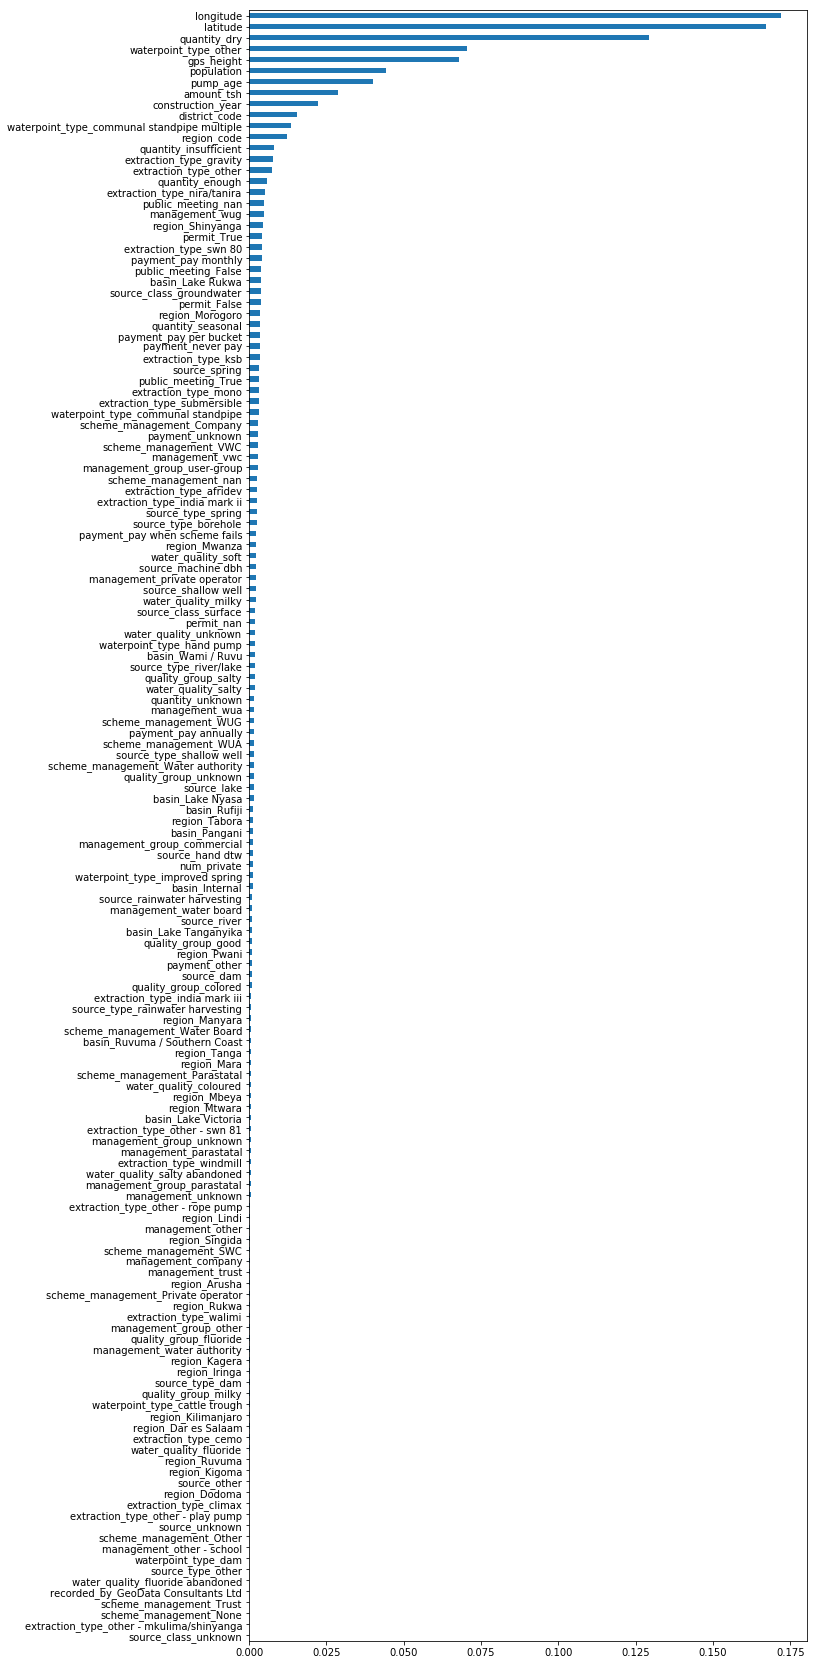

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
encoder = decision_tree.named_steps['onehotencoder']
encoded_columns = encoder.fit_transform(X_train).columns
importances = pd.Series(model.feature_importances_, encoded_columns)
plt.figure(figsize=(10,30))
importances.sort_values().plot.barh();

In [0]:
sorted(X_train.pump_age.unique())

[nan,
 0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0]

In [0]:
train.query('pump_age < 0')

Empty DataFrame
Columns: [id, amount_tsh, date_recorded, funder, gps_height, longitude, latitude, wpt_name, num_private, basin, subvillage, region, region_code, district_code, lga, ward, population, public_meeting, recorded_by, scheme_management, scheme_name, permit, construction_year, extraction_type, management, management_group, payment, water_quality, quality_group, quantity, source, source_type, source_class, waterpoint_type, status_group, pump_age]
Index: []

In [0]:
X_train.waterpoint_type.value_counts(dropna=False)

communal standpipe             22778
hand pump                      14015
other                           5138
communal standpipe multiple     4864
improved spring                  631
cattle trough                     89
dam                                5
Name: waterpoint_type, dtype: int64

In [0]:
X_train.gps_height.value_counts(dropna=False)

 0       16305
-15         48
 1290       45
-20         43
-14         43
-16         42
-13         42
-18         40
 280        39
 1269       37
 320        37
 1304       37
 1538       37
 303        36
 1295       36
 1303       36
 1264       36
-8          36
 338        36
 1286       36
 1359       35
 1342       35
 1240       35
 1613       35
 1335       35
 1319       35
 1602       35
 1401       35
 1288       35
-27         34
         ...  
 2292        1
 2388        1
 2420        1
 2484        1
 2295        1
 2417        1
 2385        1
 2353        1
 2319        1
 2285        1
 2413        1
 2509        1
 2220        1
 621         1
 653         1
 2159        1
 2255        1
 2287        1
 2351        1
 2321        1
 622         1
 1998        1
 2126        1
 2254        1
 2286        1
 2318        1
 591         1
 2193        1
 2289        1
 2031        1
Name: gps_height, Length: 2401, dtype: int64

In [0]:
test_pred = decision_tree.predict(X_test)
submission = sample_submission.copy()
submission['status_group'] = test_pred
submission.to_csv('vince_kaggle02.csv', index=False)

In [0]:
!head vince_kaggle02.csv

id,status_group
50785,functional
51630,functional
17168,functional
45559,non functional
49871,functional
52449,functional
24806,non functional
28965,non functional
36301,functional


In [0]:
if in_colab:
  from google.colab import files
  files.download('vince_kaggle02.csv')